In [43]:
import pandas as pd
import matplotlib.pyplot as mtp
import seaborn as sns

# Data Acquisition and Understanding

In [44]:
df=pd.read_csv("seattle.csv")
df.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


df.shape

In [45]:
df.dtypes

beds                int64
baths             float64
size              float64
size_units         object
lot_size          float64
lot_size_units     object
zip_code            int64
price             float64
dtype: object

In [46]:
df.shape

(2016, 8)

In [47]:
df.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


# Data Cleaning

In [48]:
df.isnull().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [49]:
for feature in df:
    print(df[feature].value_counts(),"\n")

beds
3     645
2     560
4     398
1     256
5     123
6      22
9       5
7       3
8       2
15      1
14      1
Name: count, dtype: int64 

baths
2.0    627
1.0    493
2.5    282
3.0    198
3.5    179
1.5    137
4.0     37
4.5     21
5.0     16
5.5     13
6.0      5
7.0      4
8.5      1
0.5      1
9.0      1
6.5      1
Name: count, dtype: int64 

size
2080.0    12
1440.0    11
1460.0    11
1370.0    11
1670.0    11
          ..
1548.0     1
1174.0     1
1865.0     1
578.0      1
795.0      1
Name: count, Length: 879, dtype: int64 

size_units
sqft    2016
Name: count, dtype: int64 

lot_size
5000.0    61
4000.0    45
6000.0    38
1.0       26
4800.0    16
          ..
745.0      1
5043.0     1
2256.0     1
8540.0     1
4267.0     1
Name: count, Length: 959, dtype: int64 

lot_size_units
sqft    1449
acre     220
Name: count, dtype: int64 

zip_code
98115    170
98103    166
98117    151
98144    113
98122    109
98118    100
98116     88
98107     83
98126     80
98106     78
98125

from above results, we can conclude that data is cleaned

In [50]:
df['lot_size'] = df['lot_size'].fillna(df['lot_size'].mean())
df['lot_size_units']=df['lot_size_units'].fillna('sqft')
df.isnull().sum()

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64

from above results we can conclude that there is no missing values in the data

# Data Exploration and Visualization

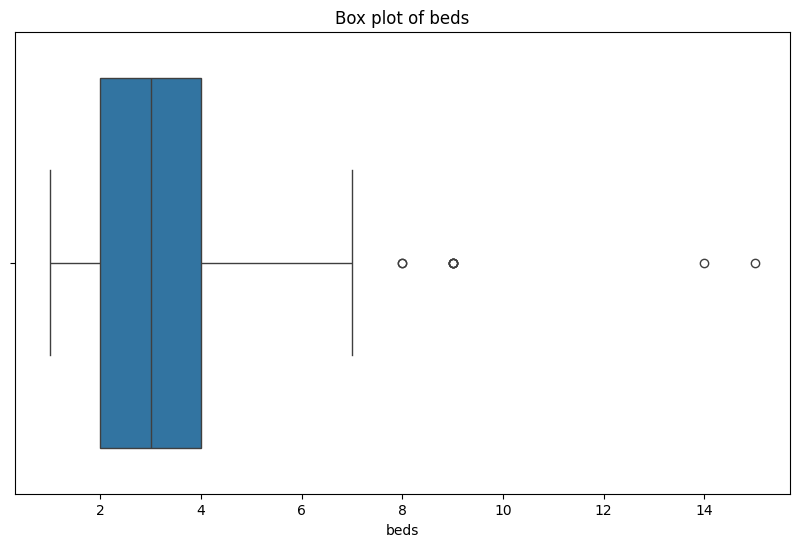

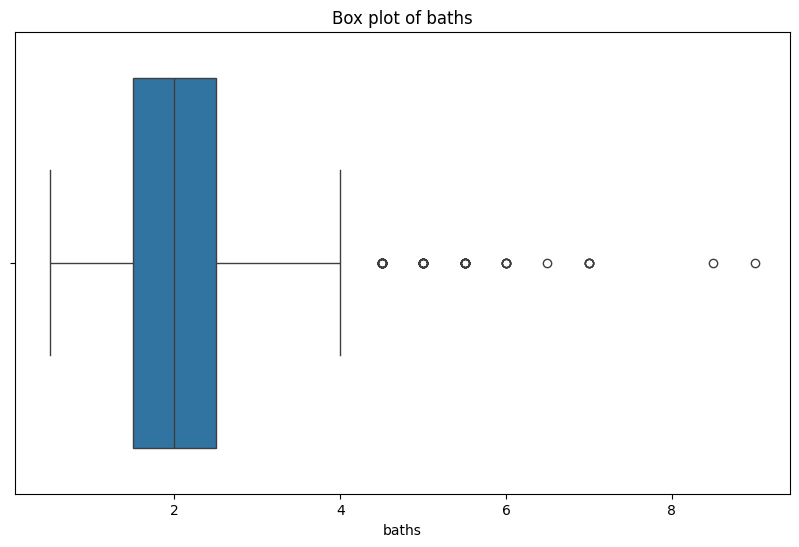

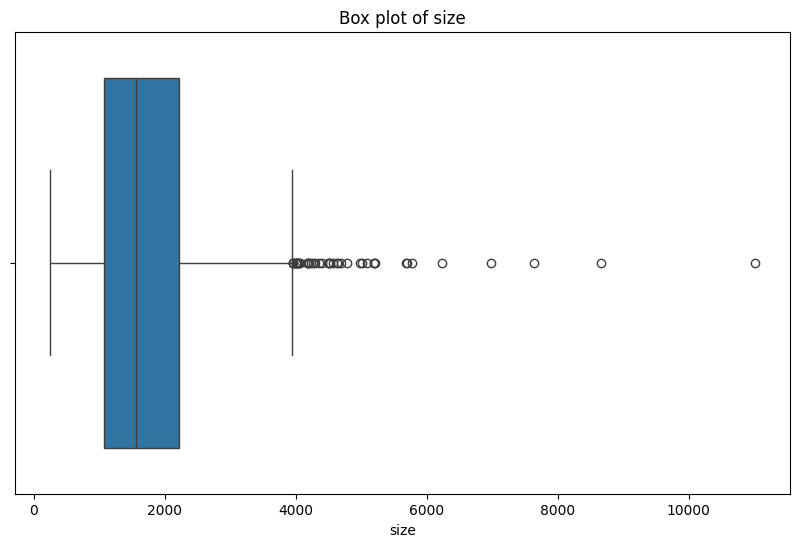

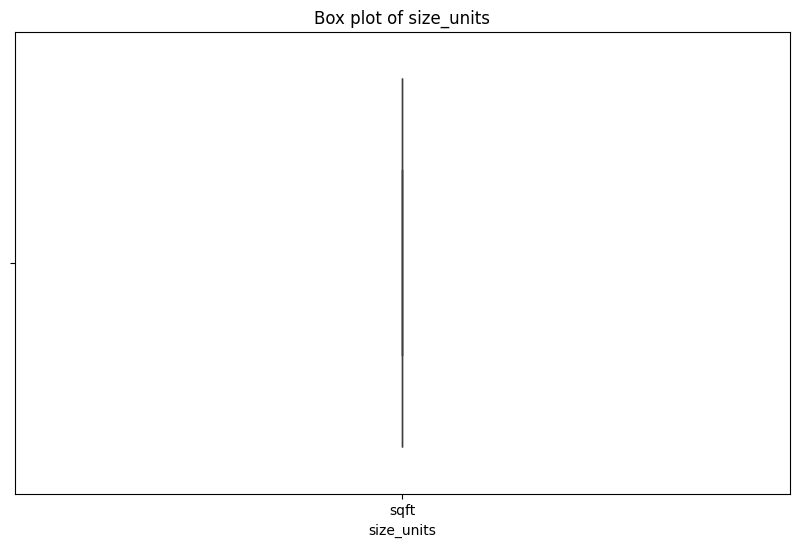

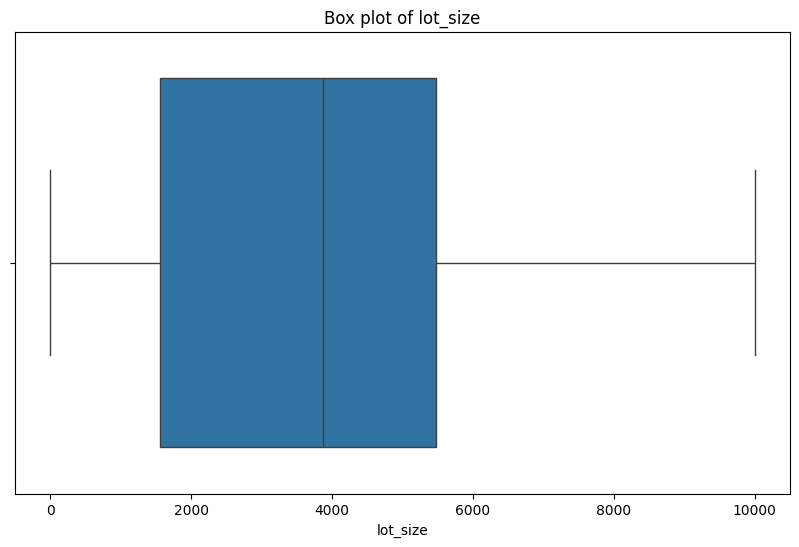

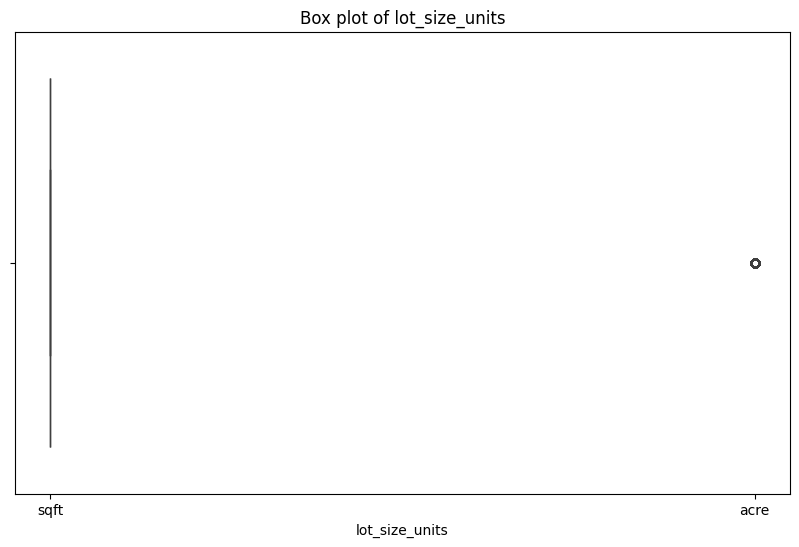

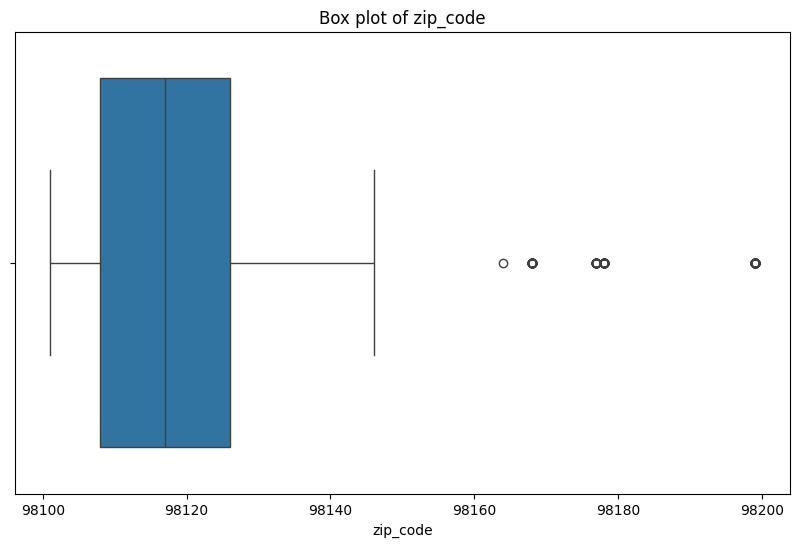

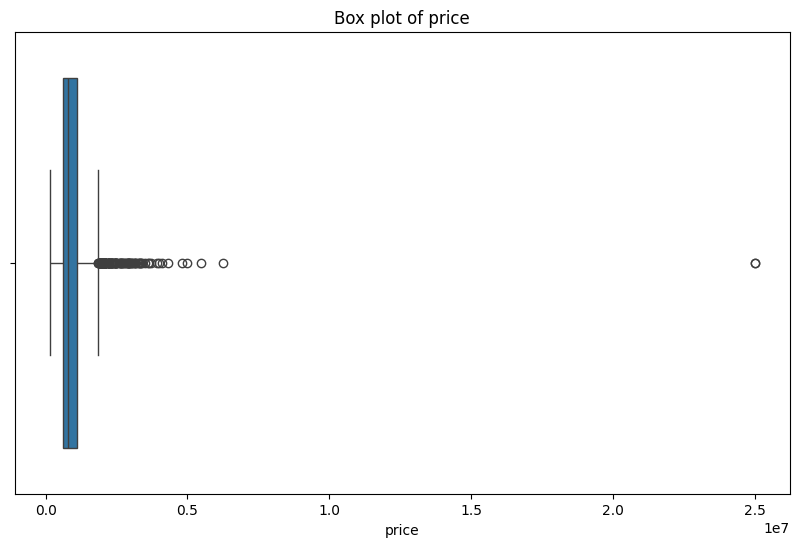

In [51]:
features = [feature for feature in df.columns]


for feature in features:
    mtp.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    mtp.title(f'Box plot of {feature}')
    mtp.show()

In [52]:
# identifying outliers using IQR method in SepalWidth Column
features = ["beds", "baths", "size",  "zip_code", "price"]
for feature in features:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    upperlimit = q3 + (1.5 * iqr)
    lowerlimit = q1 - (1.5 * iqr)
    df.loc[df[feature] > upperlimit, feature] = upperlimit
    df.loc[df[feature] < lowerlimit, feature] = lowerlimit


In [53]:
sns.boxplot

<function seaborn.categorical.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, dodge='auto', width=0.8, gap=0, whis=1.5, linecolor='auto', linewidth=None, fliersize=None, hue_norm=None, native_scale=False, log_scale=None, formatter=None, legend='auto', ax=None, **kwargs)>

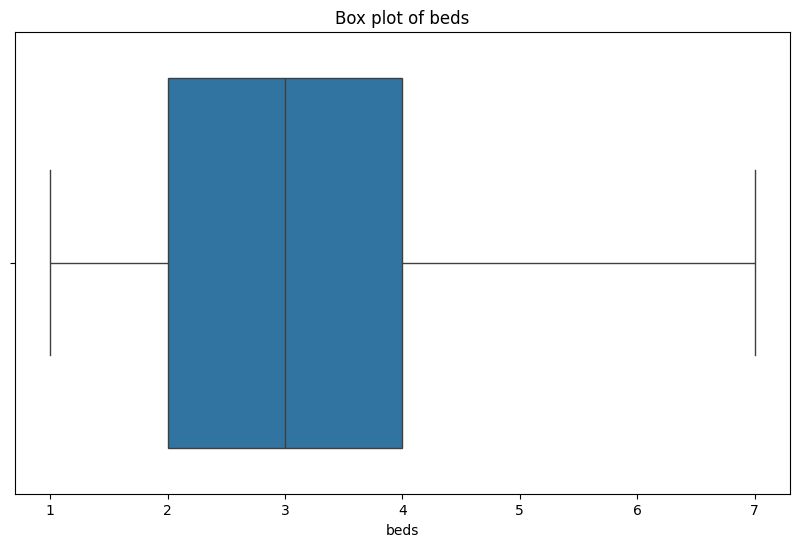

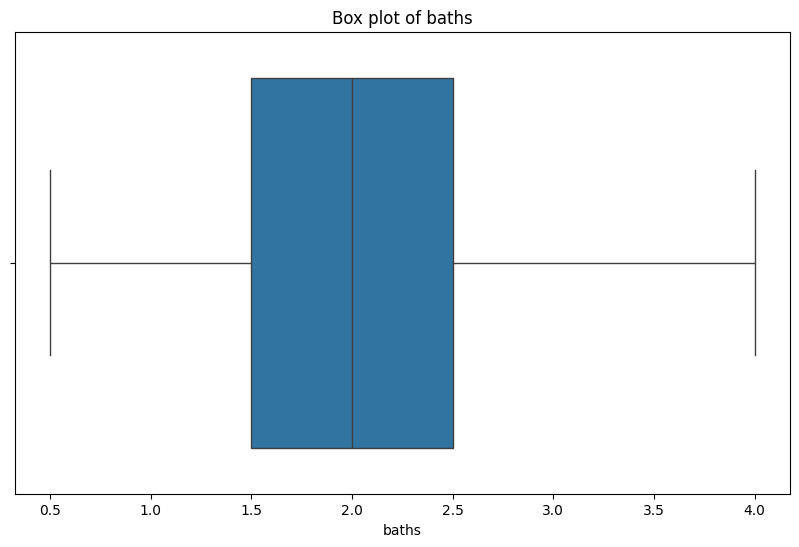

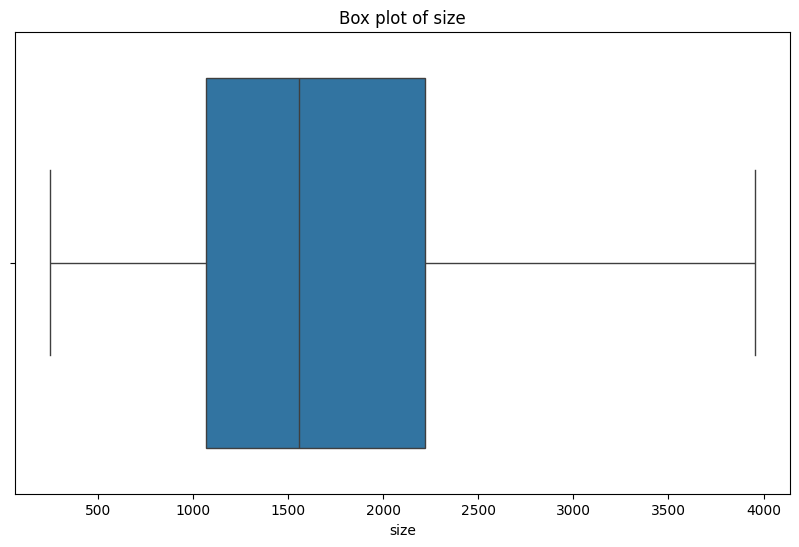

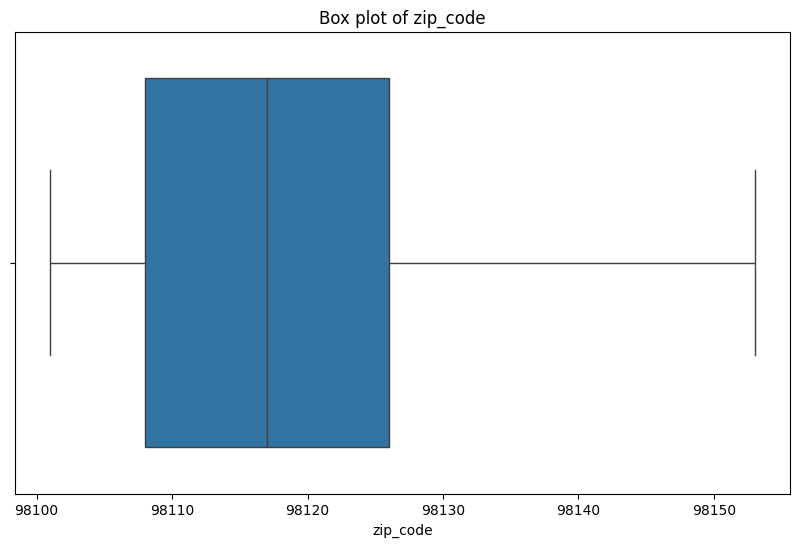

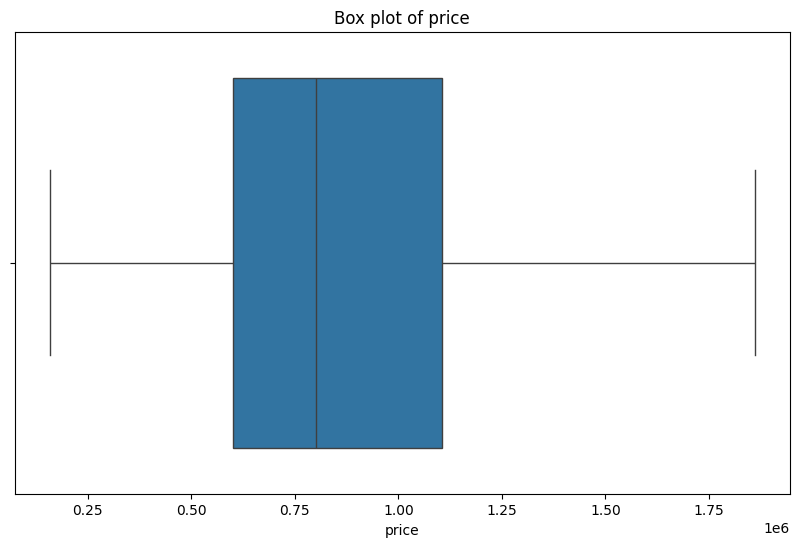

In [54]:
features = ["beds", "baths", "size",  "zip_code", "price"]


for feature in features:
    mtp.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    mtp.title(f'Box plot of {feature}')
    mtp.show()

from above results given data is sensitive to outliers

# Data Transformation


In [55]:
df.dtypes

beds                int64
baths             float64
size              float64
size_units         object
lot_size          float64
lot_size_units     object
zip_code            int64
price             float64
dtype: object

In [56]:
from sklearn.preprocessing import OneHotEncoder
one= OneHotEncoder()
data=one.fit_transform(df.iloc[:,3:4])
df["size_units"]=pd.DataFrame(data)
data=one.fit_transform(df.iloc[:,5:6])
df["lot_size_units"]=pd.DataFrame(data)
df


,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,"(0, 0)\t1.0",6000.000000,"(0, 1)\t1.0",98144,795000.0
1,4,2.0,2240.0,"(0, 0)\t1.0",0.310000,"(0, 0)\t1.0",98106,915000.0
2,4,3.0,2040.0,"(0, 0)\t1.0",3783.000000,"(0, 1)\t1.0",98107,950000.0
3,4,3.0,3800.0,"(0, 0)\t1.0",5175.000000,"(0, 1)\t1.0",98153,1860500.0
4,2,2.0,1042.0,"(0, 0)\t1.0",3871.059694,"(0, 1)\t1.0",98102,950000.0
...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,"(0, 0)\t1.0",0.500000,"(0, 0)\t1.0",98112,910000.0
2012,1,1.0,889.0,"(0, 0)\t1.0",3871.059694,"(0, 1)\t1.0",98121,550000.0
2013,4,2.0,2140.0,"(0, 0)\t1.0",6250.000000,"(0, 1)\t1.0",98153,1150000.0
2014,2,2.0,795.0,"(0, 0)\t1.0",3871.059694,"(0, 1)\t1.0",98103,590000.0


In [57]:
df.dtypes

beds                int64
baths             float64
size              float64
size_units         object
lot_size          float64
lot_size_units     object
zip_code            int64
price             float64
dtype: object

# Feataure Selection


In [58]:

df.drop(["size_units", "lot_size_units"], axis=1, inplace=True)
correlation_matrix = df.corr()
print(correlation_matrix)


              beds     baths      size  lot_size  zip_code     price
beds      1.000000  0.663245  0.791751  0.265876  0.092924  0.588206
baths     0.663245  1.000000  0.679405  0.006763  0.000126  0.619272
size      0.791751  0.679405  1.000000  0.271847  0.074180  0.781191
lot_size  0.265876  0.006763  0.271847  1.000000  0.152369  0.170767
zip_code  0.092924  0.000126  0.074180  0.152369  1.000000 -0.086244
price     0.588206  0.619272  0.781191  0.170767 -0.086244  1.000000


In [59]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]
X.head()

,beds,baths,size,lot_size,zip_code
0,3,2.5,2590.0,6000.000000,98144
1,4,2.0,2240.0,0.310000,98106
2,4,3.0,2040.0,3783.000000,98107
3,4,3.0,3800.0,5175.000000,98153
4,2,2.0,1042.0,3871.059694,98102


In [60]:
y.head()

,price
0,795000.0
1,915000.0
2,950000.0
3,1860500.0
4,950000.0


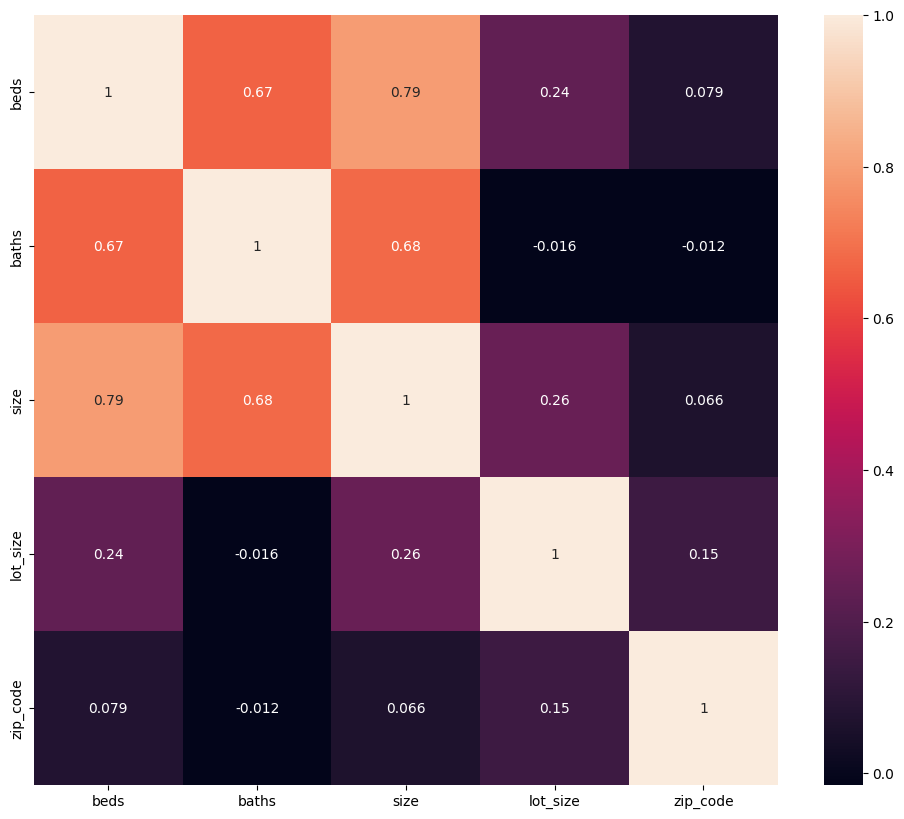

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape
import seaborn as sns
#Using Pearson Correlation
mtp.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
mtp.show()

In [62]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

0

In [63]:
corr_features

set()

In [64]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_test

,beds,baths,size,lot_size,zip_code
1358,2,3.0,1226.0,3871.059694,98144
1343,1,1.0,614.0,0.370000,98109
1529,4,3.5,3180.0,3375.000000,98122
1471,4,2.0,1170.0,9594.000000,98153
1900,2,2.0,1019.0,3871.059694,98119
...,...,...,...,...,...
1948,4,2.0,1770.0,3920.000000,98115
210,2,2.0,1201.0,720.000000,98103
1408,6,2.0,2230.0,5300.000000,98118
1473,2,2.0,1420.0,1232.000000,98107


In [65]:
df1=X_test.iloc[:,::]
df1['price']=df['price']
df1

,beds,baths,size,lot_size,zip_code,price
1358,2,3.0,1226.0,3871.059694,98144,589990.0
1343,1,1.0,614.0,0.370000,98109,369950.0
1529,4,3.5,3180.0,3375.000000,98122,1860500.0
1471,4,2.0,1170.0,9594.000000,98153,530000.0
1900,2,2.0,1019.0,3871.059694,98119,813000.0
...,...,...,...,...,...,...
1948,4,2.0,1770.0,3920.000000,98115,1425000.0
210,2,2.0,1201.0,720.000000,98103,699950.0
1408,6,2.0,2230.0,5300.000000,98118,700000.0
1473,2,2.0,1420.0,1232.000000,98107,690000.0


In [66]:
#sns.pairplot(df1)

In [67]:
from sklearn.preprocessing import StandardScaler
features = df1.columns
print(features)
scaler = StandardScaler()
df1[features] = scaler.fit_transform(df1[features])
df1.head()

Index(['beds', 'baths', 'size', 'lot_size', 'zip_code', 'price'], dtype='object')


,beds,baths,size,lot_size,zip_code,price
1358,-0.729792,0.996299,-0.600864,0.028634,1.679860,-0.788418
1343,-1.574007,-1.342249,-1.357069,-1.557415,-0.769261,-1.325778
1529,0.958637,1.580935,1.813556,-0.174631,0.140412,2.314297
1471,0.958637,-0.172975,-0.670059,2.373659,2.309634,-0.934920
1900,-0.729792,-0.172975,-0.856639,0.028634,-0.069512,-0.243805


In [68]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1:]
X.head()

,beds,baths,size,lot_size,zip_code
1358,-0.729792,0.996299,-0.600864,0.028634,1.679860
1343,-1.574007,-1.342249,-1.357069,-1.557415,-0.769261
1529,0.958637,1.580935,1.813556,-0.174631,0.140412
1471,0.958637,-0.172975,-0.670059,2.373659,2.309634
1900,-0.729792,-0.172975,-0.856639,0.028634,-0.069512


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((423, 5), (182, 5))

In [70]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("r2_score",r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

r2_score 0.6261767820238011


In [72]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Lasso regression model
lr = Ridge()
lr.fit(X_train, y_train)

# Predict using the trained model
y_pred = lr.predict(X_test)

# Calculate and print the r2_score
r2 = r2_score(y_test, y_pred)
print("r2_score:", r2)


r2_score: 0.6256646832978241
